# Homework04 Diabetes Dataset 

# COMBINE WEEK09 WEEK06

While browsing week06 I was thinking about the decision tree model being so interspersed and whether we could visualise it. Searched for ways to visualise decision trees. Combined with week09 introduced data preprocessing, dataset partitioning, model training and evaluation, adding a multi-dimensional understanding of the data.

## DATA:
This code uses several Python libraries and methods to implement a movie recommendation system with data analysis and visualisation
Data source:https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
Method source:https://github.com/mwaskom/seaborn
https://github.com/parrt/dtreeviz



## Methods:
Data manipulation using ``Pandas``.
Data visualisation using ``Seaborn`` and ``Matplotlib``.
Data preprocessing, classification and clustering using ``Scikit``-learn.data sparsity.

## OBJECTIVE:

Understand the basic characteristics and distribution of data sets.
Discover patterns and relationships in data through visualisation.
Use clustering algorithms to group data.

## output:

Basic statistical information about the dataset and missing values.
Visual graphs of data distribution, feature correlation and clustering results.

## Advantages

Comprehensive data analysis: the code covers all aspects of data loading, pre-processing, visualisation and cluster analysis.
Visualisation: Visualisation of data distribution and feature correlation through charts and graphs helps to understand the data.
Modularity: The code has a clear structure and is easy to extend and modify.

## Disadvantages

Lack of training and evaluation of classification models: although DecisionTreeClassifier was imported, it was not actually used for classification tasks.
Interpretation of clustering results: only the first two features were visualised for clustering, which may not fully reflect the clustering effect on high-dimensional data.
Hard-coded dataset paths: the dataset paths are hard-coded, and it may be necessary to manually modify the paths to suit different environments.


## Methods:
Load user rating data from combined_data_1.txt and handle missing values.
Load movie titles data from movie_titles.csv and process missing values.
Plot the distribution of ratings, the distribution of the number of movie ratings, the distribution of the number of user ratings, and the heat map of ratings.
Perform cluster analysis of movies using ``KMeans`` and visualise the clustering results.
Construct recommender system using ``SVD`` algorithm and cross validate it.
Predict movie ratings for a specific user (ID 785314) and output the top 10 movies with the highest predicted ratings.
Based on Pearson's correlation coefficient, recommend the top 10 films that are similar to a particular film.
Filter out movies and users with fewer ratings based on the quartile of the number of ratings (70%) to reduce data sparsity.

## OBJECTIVE:

The goal is to build an efficient and accurate movie recommendation system through data analysis and machine learning methods, and to provide personalised movie recommendation services for users. At the same time, the data features and model results are shown through visual means to help users better understand the operation of the recommendation system

## output:

Data set information and statistical results.
Visualisation charts (e.g. ratings distribution, clustering results, etc.).
Recommender system results (e.g. personalised recommendations and movie-based recommendations).
Model evaluation results (e.g., RMSE and MAE values for SVD).

## Advantages

The code structure is clear, divided into several modules such as data loading, data exploration, recommendation system construction and recommendation result display, which is easy to understand and expand.
Supports multiple recommendation methods (SVD and correlation-based recommendation), users can choose the appropriate method according to their needs.
Through data analysis and visualisation, user behaviour and movie characteristics are deeply explored, providing data support for the recommendation system.
By filtering sparse data and using efficient algorithms (e.g. SVD), the operation efficiency of the recommendation system is improved.

## Disadvantages

The code only loads the combined_data_1.txt file, not the complete Netflix Prize dataset (combined_data_2.txt, combined_data_3.txt, combined_data_4.txt), which may lead to less comprehensive recommendation results.
The SVD algorithm and Pearson correlation coefficient calculations may be slow on large-scale datasets, especially when the number of users and films is high.
For new users or new films, the recommender system may not be able to provide accurate recommendation results due to the lack of rating data.
Cluster analysis is only based on the year feature of the film and does not consider other features (e.g. genre, director, etc.), which may lead to less accurate clustering results.
Multiple visualisation charts are generated in the code, which may increase runtime and memory consumption.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from dtreeviz import model  

data = pd.read_csv(r'E:\work_daily\202503\0318\300\diabetes.csv')

print(data.head())
print(data.info()) 
print(data.describe())

print(data.isnull().sum())



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

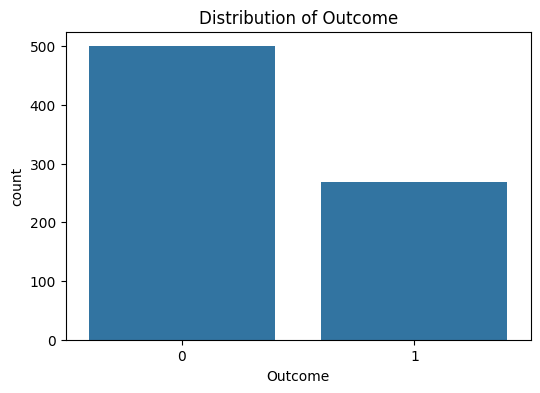

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.show()




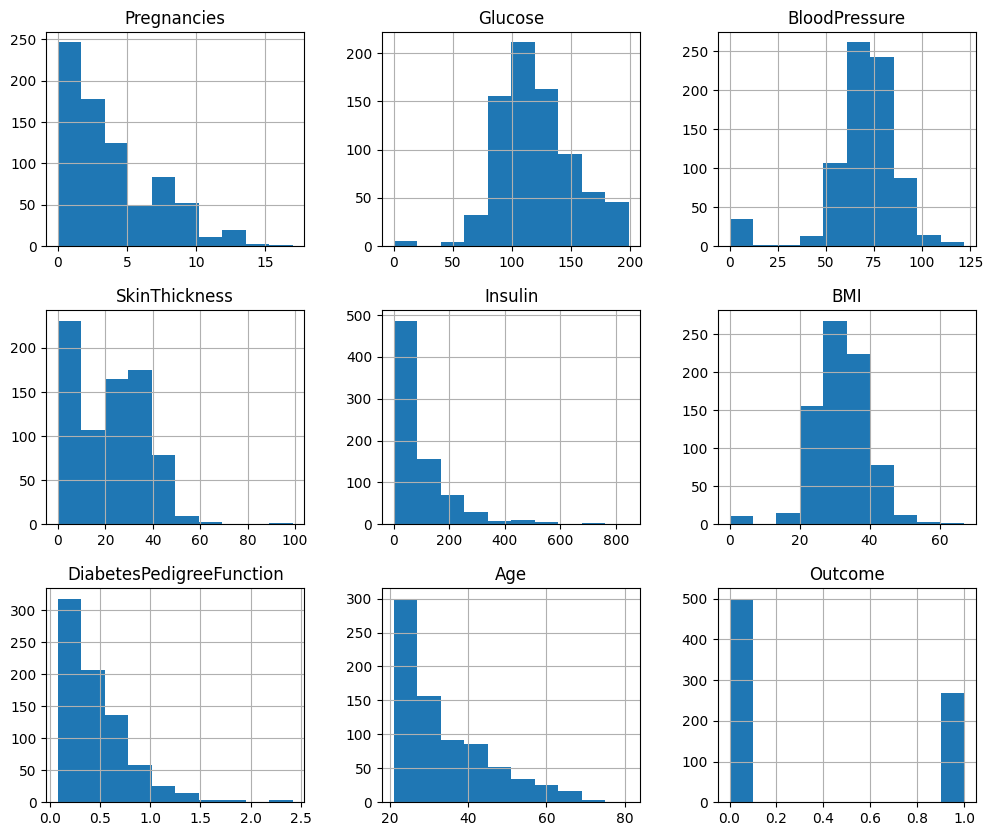

In [5]:
data.hist(figsize=(12, 10))
plt.show()


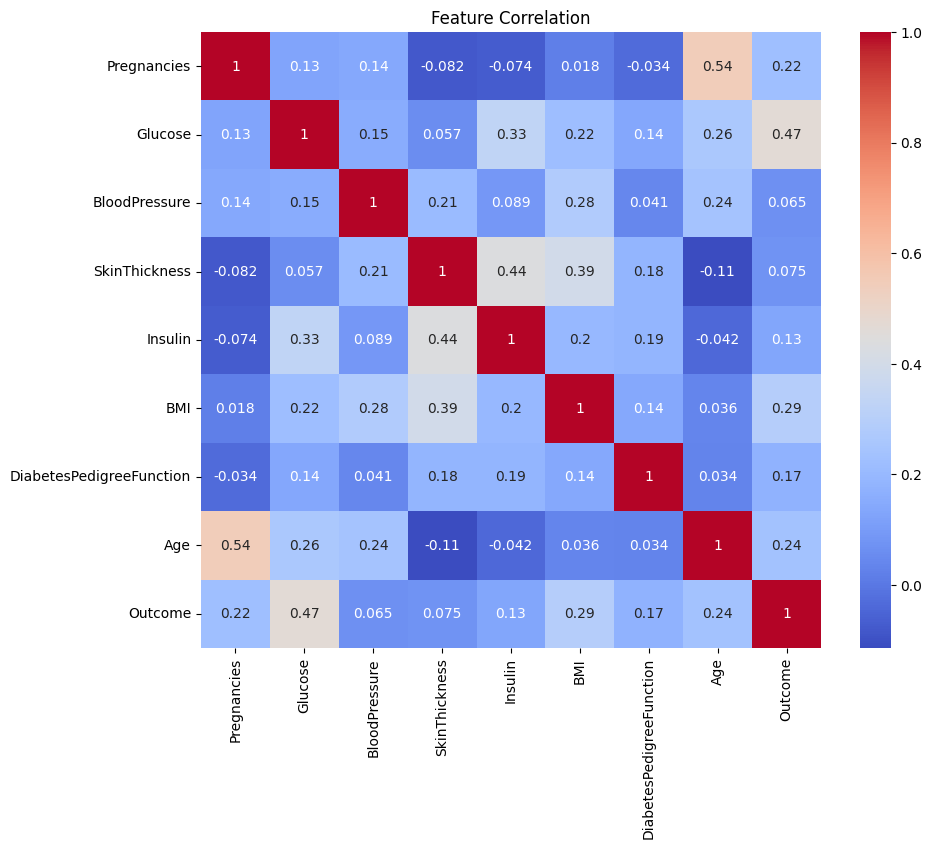

In [6]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

D:\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
D:\anaconda3\envs\pytorch\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  File "D:\anaconda3\envs\pytorch\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\anaconda3\envs\pytorch\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\anaconda3\envs\pytorch\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\an

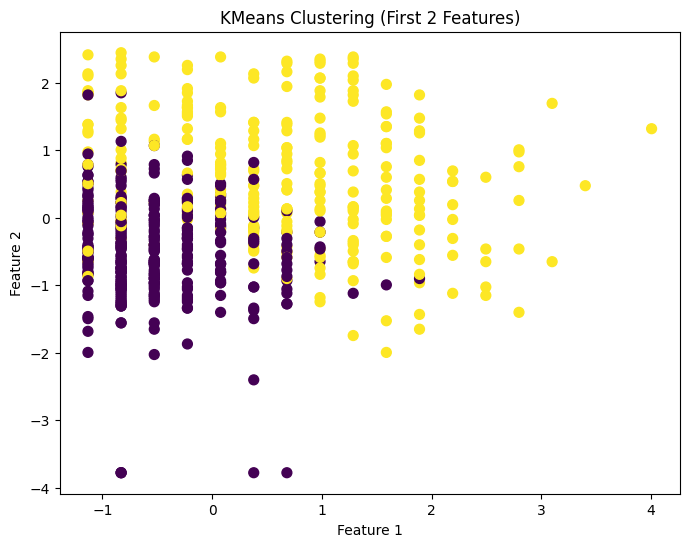

In [7]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled_df)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled_df.iloc[:, 0], X_train_scaled_df.iloc[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('KMeans Clustering (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()